# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [ ]:
import pandas as pd

# Import the data using the file path
#filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
filepath = '/content/gdrive/MyDrive/M.S.c - mahon lev/Computational learning/Class 2/data_2/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

In [ ]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [ ]:
data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [ ]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [ ]:
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [ ]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [ ]:
X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [ ]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [ ]:
y_data.values[10:20],y_pred[10:20]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
print(accuracy(y_data, y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [ ]:
knn_p1 = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)

knn_p1 = knn_p1.fit(X_data, y_data)

y_pred_p1 = knn_p1.predict(X_data)

In [ ]:
print(accuracy(y_data, y_pred_p1))

1.0


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [ ]:
acc_according_to_k = {}

for i in range(1, 21):
  knn_according_to_k = KNeighborsClassifier(n_neighbors=i)
  knn_according_to_k = knn_according_to_k.fit(X_data, y_data)
  y_pred_k = knn_according_to_k.predict(X_data)

  acc = accuracy(y_data, y_pred_k)

  acc_according_to_k[i] = acc

print(acc_according_to_k)
  

{1: 1.0, 2: 0.9292, 3: 0.9422, 4: 0.9154, 5: 0.9284, 6: 0.9156, 7: 0.9254, 8: 0.9122, 9: 0.9224, 10: 0.9092, 11: 0.9158, 12: 0.9076, 13: 0.9148, 14: 0.905, 15: 0.9098, 16: 0.9044, 17: 0.908, 18: 0.9028, 19: 0.9078, 20: 0.902}


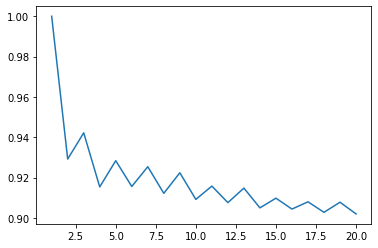

In [ ]:
import matplotlib.pylab as plt

lists = acc_according_to_k.items()

x, y = zip(*lists) 

plt.plot(x, y)
plt.show()

# Now with Iris

Load, shuffle and split Iris data (Lesson 1)
... don´t forget scaling features

In [ ]:
import numpy as np
import pandas as pd

filepath = filepath = '/content/gdrive/MyDrive/M.S.c - mahon lev/Computational learning/Class 1/data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.columns,data.shape)
data

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


X = frames, 
y = target

In [ ]:
y = data.pop('species').to_frame()
X = data

In [ ]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],             species
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows x

In [ ]:
np.std(X)

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.75)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((37, 4), (37, 1), (113, 4), (113, 1))

In [ ]:
X_train,y_train

(     sepal_length  sepal_width  petal_length  petal_width
 102           7.1          3.0           5.9          2.1
 46            5.1          3.8           1.6          0.2
 136           6.3          3.4           5.6          2.4
 94            5.6          2.7           4.2          1.3
 121           5.6          2.8           4.9          2.0
 5             5.4          3.9           1.7          0.4
 71            6.1          2.8           4.0          1.3
 69            5.6          2.5           3.9          1.1
 14            5.8          4.0           1.2          0.2
 95            5.7          3.0           4.2          1.2
 104           6.5          3.0           5.8          2.2
 114           5.8          2.8           5.1          2.4
 4             5.0          3.6           1.4          0.2
 124           6.7          3.3           5.7          2.1
 134           6.1          2.6           5.6          1.4
 143           6.8          3.2           5.9          2

Train a k-NN classifier on the training data, test on the testing data, explore different settings, number of input features, accuracies, ..., compare with colleagues, write conclusions

In [ ]:
knn_iris = KNeighborsClassifier(n_neighbors = 3)
knn_iris.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_iris.score(X_test, y_test)

0.9292035398230089